# Actividad - Ecuaciones diferenciales 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp, odeint
from numpy.linalg import norm

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [2]:
def f(t,x):
    return x/(t+1)

tspan=[0,20]
x0=np.array([2])
x2=solve_ivp(f,tspan,x0,max_step=0.1 ) #,max_step=0.1 (si quiero limitar el tamaño de paso)
x2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1202
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2

Grafique con condición inicial $x_0 = 2$

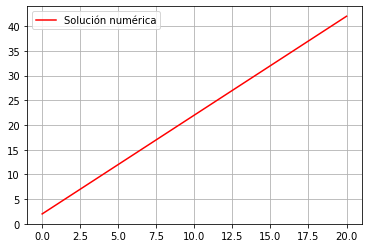

In [3]:
plt.figure()
plt.plot(x2.t,x2.y[0,:],"r",label="Solución numérica")
plt.legend(loc="best")
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [4]:
w0=3
def funcion(t,X):
    #X es un arreglo con la posición y la velocidad
    return [X[1],-(w0)**(2)*X[0]]

In [5]:
x3=solve_ivp(funcion,[0,50],np.asarray([0.5,0.1]))
x3

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 944
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 3.15523578e-02, 2.27261409e-01, 5.28168032e-01,
       8.61003701e-01, 1.18316806e+00, 1.50098112e+00, 1.83218442e+00,
       2.14635558e+00, 2.47726245e+00, 2.80337308e+00, 3.10697173e+00,
       3.43989074e+00, 3.75818628e+00, 4.08423442e+00, 4.41326092e+00,
       4.72273028e+00, 5.05565472e+00, 5.37848644e+00, 5.69436332e+00,
       6.02590825e+00, 6.34081539e+00, 6.67111940e+00, 6.99774348e+00,
       7.30245607e+00, 7.63554257e+00, 7.95468327e+00, 8.27927832e+00,
       8.60884286e+00, 8.91940390e+00, 9.25206165e+00, 9.57569864e+00,
       9.88898102e+00, 1.02209105e+01, 1.05366842e+01, 1.08661578e+01,
       1.11933783e+01, 1.14993608e+01, 1.18325663e+01, 1.21526678e+01,
       1.24753689e+01, 1.28055248e+01, 1.31172847e+01, 1.34495076e+01,
       1.37740197e+01, 1.40841617e+01, 1

Grafique

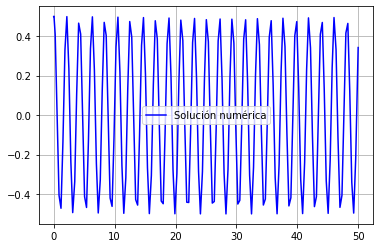

In [6]:
plt.figure()
plt.plot(x3.t,x3.y[0,:],"b",label="Solución numérica")
plt.legend(loc="best")
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [7]:
def posicion(t,x0):
    C1= x0
    C2= x0/w0
    return C1*np.cos(w0*t)+C2*np.sin(w0*t)

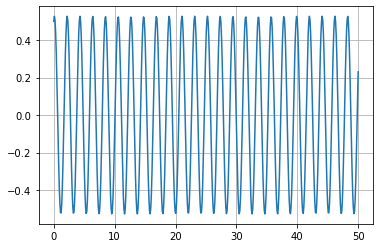

In [8]:
w0=3
x0=0.5
t=np.linspace(0,50,500)
plt.figure()
plt.plot(t,posicion(t,x0))
plt.grid()

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [9]:
x3=solve_ivp(funcion,[0,10],np.asarray([0.5,0.1]))

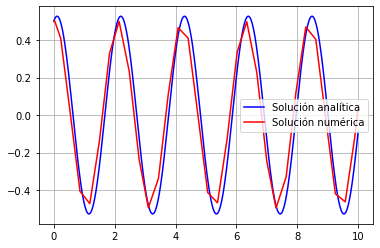

In [10]:
w0=3
x0=0.5
t=np.linspace(0,10,500)
plt.figure()
plt.plot(t,posicion(t,x0),"b",label="Solución analítica")
plt.plot(x3.t,x3.y[0,:],"r",label="Solución numérica")
plt.legend()
plt.grid()